In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

# PreProcessing

In [ ]:
import cv2 #library used for reading an image
import matplotlib.pyplot as plt #library used for plotting graphs or visualising images etc
from tqdm import tqdm #library used for seeing the progress

In [ ]:
path = '/content/drive/My Drive/legal/'
print(path+'1.jpg')

/content/drive/My Drive/legal/1.jpg


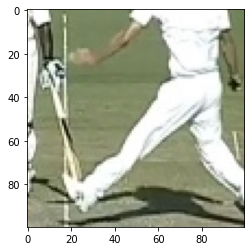

In [ ]:
img=cv2.imread(path+'1.jpg')
plt.imshow(img)
plt.show()

In [ ]:
X=[]
y=[]
path_legal = '/content/drive/My Drive/legal/'
for i in tqdm(range(1,3071)):
  X.append(path_legal + str(i) + '.jpg')
  y.append(0)
path_no = '/content/drive/My Drive/no/'
for i in tqdm(range(1,2601)):
  X.append(path_no + str(i) + '.jpg')
  y.append(1)





100%|██████████| 2600/2600 [00:00<00:00, 400234.54it/s]


In [ ]:
import pandas as pd#data analysis and manipulation library 


In [ ]:
df=pd.DataFrame(X)
df

,0
0,/content/drive/My Drive/legal/1.jpg
1,/content/drive/My Drive/legal/2.jpg
2,/content/drive/My Drive/legal/3.jpg
3,/content/drive/My Drive/legal/4.jpg
4,/content/drive/My Drive/legal/5.jpg
...,...
5665,/content/drive/My Drive/no/2596.jpg
5666,/content/drive/My Drive/no/2597.jpg
5667,/content/drive/My Drive/no/2598.jpg
5668,/content/drive/My Drive/no/2599.jpg


In [ ]:
df['label']=y


In [ ]:
df.columns=['image_id','label']
df

,image_id,label
0,/content/drive/My Drive/legal/1.jpg,0
1,/content/drive/My Drive/legal/2.jpg,0
2,/content/drive/My Drive/legal/3.jpg,0
3,/content/drive/My Drive/legal/4.jpg,0
4,/content/drive/My Drive/legal/5.jpg,0
...,...,...
5665,/content/drive/My Drive/no/2596.jpg,1
5666,/content/drive/My Drive/no/2597.jpg,1
5667,/content/drive/My Drive/no/2598.jpg,1
5668,/content/drive/My Drive/no/2599.jpg,1


In [ ]:
df=df.sample(frac=1)
df

,image_id,label
1744,/content/drive/My Drive/legal/1745.jpg,0
4497,/content/drive/My Drive/no/1428.jpg,1
4965,/content/drive/My Drive/no/1896.jpg,1
4847,/content/drive/My Drive/no/1778.jpg,1
5612,/content/drive/My Drive/no/2543.jpg,1
...,...,...
3867,/content/drive/My Drive/no/798.jpg,1
3731,/content/drive/My Drive/no/662.jpg,1
4049,/content/drive/My Drive/no/980.jpg,1
3203,/content/drive/My Drive/no/134.jpg,1


In [ ]:
from sklearn.model_selection import train_test_split #package to split the data into training and testing sets
X_train,X_test=train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
X_train

,image_id,label
416,/content/drive/My Drive/legal/417.jpg,0
3207,/content/drive/My Drive/no/138.jpg,1
1780,/content/drive/My Drive/legal/1781.jpg,0
1008,/content/drive/My Drive/legal/1009.jpg,0
1180,/content/drive/My Drive/legal/1181.jpg,0
...,...,...
3087,/content/drive/My Drive/no/18.jpg,1
3355,/content/drive/My Drive/no/286.jpg,1
1250,/content/drive/My Drive/legal/1251.jpg,0
3837,/content/drive/My Drive/no/768.jpg,1


In [ ]:
X_train,y_train=X_train['image_id'], X_train['label']

In [ ]:
from collections import Counter #used to see the no: of examples in each class
Counter(y_train)

Counter({0: 2417, 1: 2119})

In [ ]:
X_test,y_test=X_test['image_id'], X_test['label']

In [ ]:
Counter(y_test)

Counter({0: 653, 1: 481})

In [ ]:
X_train=list(X_train)
#print(X_train)
for i in tqdm(range(len(X_train))):
  img=cv2.imread(X_train[i],cv2.IMREAD_UNCHANGED)
  X_train[i] = img
X_test=list(X_test)
for i in tqdm(range(len(X_test))):
  img=cv2.imread(X_test[i],cv2.IMREAD_UNCHANGED)
  X_test[i] = img

100%|██████████| 1134/1134 [05:28<00:00,  3.46it/s]


In [ ]:
import numpy as np # package for arrays etc

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
print(X_train.shape)

(4536, 100, 100, 3)


In [ ]:
print(X_test.shape)

(1134, 100, 100, 3)


#Normalizing

In [ ]:
#Normalizing the data to reduce data redundancy and data integrity
X_train_max=np.max(X_train)
X_train=X_train/X_train_max

In [ ]:
X_test_max=np.max(X_test)
X_test=X_test/X_test_max

#Model

In [ ]:
import tensorflow as tf# library for ML, DL 
from tensorflow import keras#Deep learning API
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.python.keras.applications import vgg19
import pickle#used to store the model



In [ ]:
model=Sequential()
model.add(vgg19.VGG19(include_top = False, input_shape = (100, 100, 3), weights ='imagenet', classes = 2, pooling  = MaxPool2D))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable=False

print(model.summary())

80142336/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 4096)              18878464  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4097      
Total params: 38,906,945
Trainable params: 18,882,561
Non-trainable params: 20,024,384
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
checkpoint_path = "/content/drive/My Drive/saved/checkpoints.pkl"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)
history = model.fit(X_train, y_train, batch_size = 50, validation_data=(X_test, y_test), epochs = 50,callbacks=[cp_callback])

Epoch 1/50
91/91 [==============================] - 45s 113ms/step - loss: 1.3565 - accuracy: 0.6621 - val_loss: 0.3548 - val_accuracy: 0.7963

Epoch 00001: saving model to /content/drive/My Drive/saved/checkpoints.pkl
Epoch 2/50
91/91 [==============================] - 7s 78ms/step - loss: 0.3128 - accuracy: 0.8377 - val_loss: 0.2640 - val_accuracy: 0.8827

Epoch 00002: saving model to /content/drive/My Drive/saved/checkpoints.pkl
Epoch 3/50
91/91 [==============================] - 7s 79ms/step - loss: 0.2403 - accuracy: 0.8828 - val_loss: 0.2744 - val_accuracy: 0.8668

Epoch 00003: saving model to /content/drive/My Drive/saved/checkpoints.pkl
Epoch 4/50
91/91 [==============================] - 7s 79ms/step - loss: 0.2135 - accuracy: 0.8933 - val_loss: 0.3358 - val_accuracy: 0.8342

Epoch 00004: saving model to /content/drive/My Drive/saved/checkpoints.pkl
Epoch 5/50
91/91 [==============================] - 7s 80ms/step - loss: 0.2091 - accuracy: 0.8969 - val_loss: 0.2712 - val_accura

In [ ]:
from keras.backend import manual_variable_initialization
manual_variable_initialization(True)
model.save("/content/drive/My Drive/ktj/saves/model_save.h5")
model.save_weights("/content/drive/My Drive/ktj/saves/model_weights.pkl")

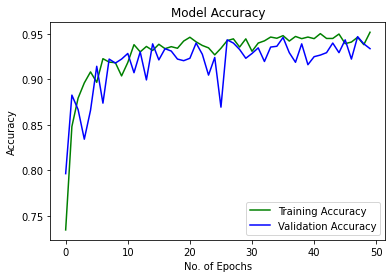

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], 'g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

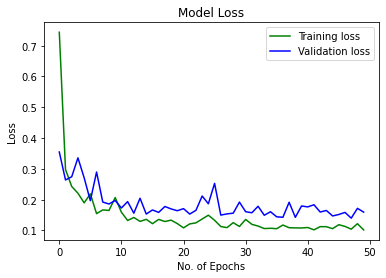

In [ ]:
plt.figure()
plt.plot(history.history['loss'], 'g', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(1134,)
y_pred = y_pred > 0.5

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       653
           1       0.91      0.94      0.92       481

    accuracy                           0.93      1134
   macro avg       0.93      0.93      0.93      1134
weighted avg       0.93      0.93      0.93      1134



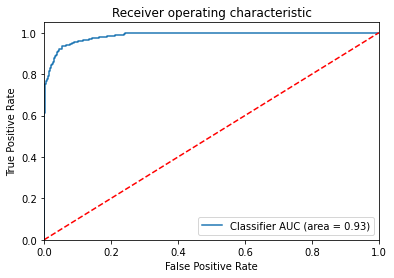

In [ ]:
from sklearn.metrics import *
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Classifier AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic',fontsize=12)
plt.legend(loc="lower right")
plt.show()